# Applied Machine Learning (2021), exercises


## General instructions for all exercises

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Do not change other areas of the document, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manualle graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks may be text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, download the whole notebook, using menu `File -> Download as -> Notebook (.ipynb)`. Save the file in your hard disk, and submit it in [Moodle](https://moodle.uwasa.fi) under the corresponding excercise.

Your solution should be an executable Python code. Use the code already existing as an example of Python programing and read more from the numerous Python programming material from the Internet if necessary. 


In [1]:
NAME = "LEON DARIO CORREA RAMIREZ"
Student_number = "e122676"

---

# Unsupervised learning, projections

## Task 1: Apply k-means

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

The data-file `liver-spectroscopy.tab` is a text file which contains a Near Infrared Spectral (NIR) measurements of different cells from a liver. The file includes 731 samples, and each one has 234 variables. The variables describes the amount of infrared radiation absorbed in each of the tested 234 wavelengths. The last column in the data is the cell type, which can be one of the four types: 'collagen', 'glycogen', 'lipids' or 'DNA'. The column names are the wavelengths used in measuring the absorbtion values for the specific columns.

In [5]:
D = pd.read_table('liver-spectroscopy.tab')
d1 = pd.read_table('liver-spectroscopy.tab')
# Print the classes
print(D.type.unique())

# Separate the true classes out from the data, into separate variable
types=pd.Categorical(D.type)
del(D['type'])

['collagen' 'glycogen' 'lipids' 'DNA']


First task is to apply PCA to transform the data `D` to PCA projection `projected`. Then apply KMeans to `projected` and try to find clusters from the data. Use just enough PCA-components to contain more than 90% of the variance. Name your KMeans object as `kmeans`.

Plot the clusters with different colors in the scatter plot using PC1 and PC2 axis.

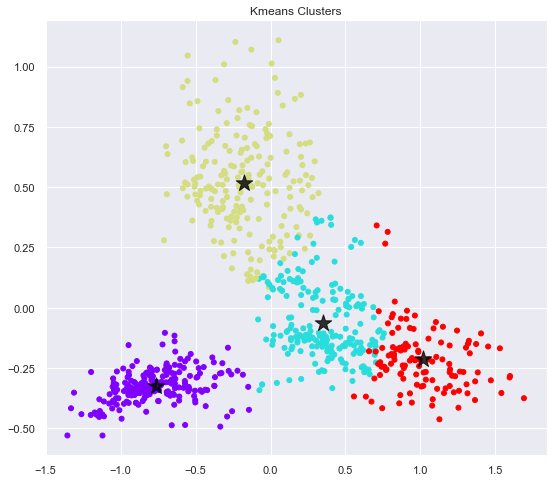

In [10]:
# YOUR CODE HERE
#Import PCA and select the right number of components of the projection (n>2)
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
projected = pca.fit_transform(D)

#Study the variance of the projection
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.plot(pca.explained_variance_ratio_)
#plt.title('The variance expalained by each PC')
#plt.xlabel('Number of PCs included')
#plt.ylabel('The variance explained / %')
#print("")

#Import Kmeans and apply it to the projected dataframe
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(projected)
y_kmeans = kmeans.predict(projected)
centers = kmeans.cluster_centers_

#Plot the cluster
plt.figure(figsize=(9,8))
plt.title('Kmeans Clusters')
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=25, cmap='rainbow')

#Add a marker to the center of the clusters
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.8, marker='*')

In [11]:
assert(kmeans.cluster_centers_.shape==(4,3))
assert(projected.shape==(731,3))
assert(abs(kmeans.inertia_-75)<5)

## Task 2, apply PCA and GMM

Use previous PCA projection and apply Gaussian Mixture Model to projected data and try to find clusters from the data. Use `gmm` as a name for GaussianMixture object.

Plot the clusters with different colors in the scatter plot using PC1 and PC2 axis.

Text(0.5, 0, 'First PCA component')

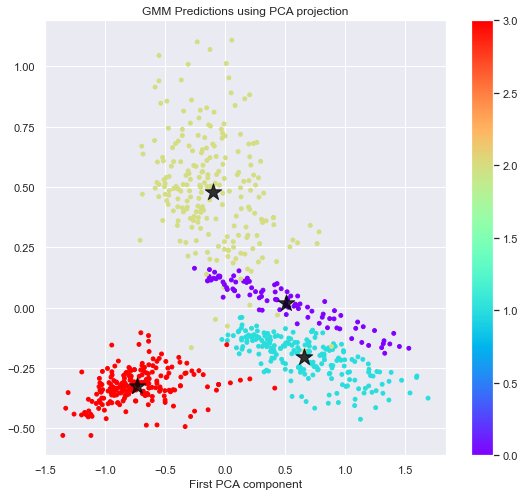

In [12]:
# YOUR CODE HERE
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=4,covariance_type='full').fit(projected)

# Predict clusters
labels = gmm.predict(projected)
centers = gmm.means_

# Plot the data
plt.figure(figsize=(9,8))
plt.scatter(projected[:, 0], projected[:, 1], c=labels, s=15, cmap='rainbow')
plt.colorbar()
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.8, marker='*');
plt.title('GMM Predictions using PCA projection')
plt.xlabel('First PCA component')

In [13]:
assert(projected.shape==(731,3))
assert(abs(gmm.bic(projected)+269)<10)

## Task 3: Confusion matrix

Calculate the confusion matrix `CM` between the clusters and true tissue types. Find from `CM`, the number of the cluster where *DNA* tissue type samples are most often assigned. Assign in variable `nDNA` the number of times the samples of tissue type *DNA* were assigned into this cluster.

Some instructions

1. Find the category number of DNA ny listing `types.categories`. The category number is the index of string 'DNA' in the list of categories.
1. Use `CM=confusion_matrix)=` -function from `sklearn.metrics` to plot the confusion matrix
1. Assign the found number in variable `nDNA`


In [14]:
types.categories

Index(['DNA', 'collagen', 'glycogen', 'lipids'], dtype='object')

In [21]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix

print('Get the index value:')
for index, value in enumerate( types.categories ):
  print('index', index,':',value)
print('Index 0 corresponds to DNA')
print()

print('Confusion matrix GMM result:')
CM = confusion_matrix(types.codes,labels)
print(CM)
print()

print('Confusion matrix KMEANS result:')
CM2 = confusion_matrix(types.codes,y_kmeans)
print(CM2)
print()

print('Number of times DNA was assigned to cluster:')
nDNA = max(CM[0])
print(nDNA)

# count number of "DNAs/0s"
#list = []
#for i in labels:
#    if i == 0:
#        list.append(i)
#len(list)
# Result was 94

Get the index value:
index 0 : DNA
index 1 : collagen
index 2 : glycogen
index 3 : lipids
Index 0 corresponds to DNA

Confusion matrix GMM result:
[[ 91  12   7   0]
 [  1 192   2   0]
 [  0   0   1 211]
 [  2   0 212   0]]

Confusion matrix KMEANS result:
[[  0  65  11  34]
 [  0 113   0  82]
 [204   8   0   0]
 [  0  19 192   3]]

Number of times DNA was assigned to cluster:
91


In [22]:
assert(nDNA==91)

## Task 3: The probability of the samples

The GMM model includes the function called `.predict_proba()` which returns the probability that a certain sample belongs to different clusters. Calculate the probabilities of each sample belongin to each cluster and assign the result in variable `P`. Then find out the proability that the last sample belongs in the cluster where most DNA samples belong to, and assign that probability in variable `pDNA`.

In [27]:
# YOUR CODE HERE

print('Calculated probability for all samples:')
P = gmm.predict_proba(projected)
print(P)
print()

print('Calculated probability for the last sample to be in the "DNA" cluster:')
pDNA = gmm.predict_proba(projected)[-1][0]
print(round(pDNA*100,2),'%')


Calculated probability for all samples:
[[4.38029168e-16 9.99692975e-01 3.07025064e-04 9.50249251e-13]
 [4.97198448e-27 9.99180051e-01 8.19931204e-04 1.74204581e-08]
 [4.84276879e-22 9.92313747e-01 7.68621205e-03 4.12969463e-08]
 ...
 [8.05055344e-01 1.70648388e-03 1.93234153e-01 4.01949303e-06]
 [9.14466188e-01 9.92009907e-08 8.55333468e-02 3.66005089e-07]
 [9.95672335e-01 2.98717491e-06 4.32463318e-03 4.48964983e-08]]

Calculated probability for the last sample to be in the "DNA" cluster:
99.57 %


In [29]:
assert(abs(pDNA-0.995)<0.001)

## Task 4: Evaluation

1. Which clustering method, KMeans or GMM is better for this case and why?
1. How can the quality of the clustering methods be assessed if 
    1. the true classes are known?
    1. the true classes are not known?
    
Answer by writing text or Markdown text in the cell below.

ANSWERS

1. GMM is a better clustering method for this case as the confussion matrix indicates a better result (True positives) between the original data and the predicted data for every cluster.

2. The quality of the clustering methods can be assessed as follows:
    A. We can compare statistically how well the obtained cluster matches in position with respect to the known true classes.
    B. We can look for the method that gives the minimum distance between points in the cluster to the center of it and the maximum distance between each cluster center.